# Visualisation of Scoring three raters

In [1]:
cd C:\Users\Helga\Documents\Work\modys-video

C:\Users\Helga\Documents\Work\modys-video


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from matplotlib import rcParams
from src.helpers import read_scores

from sklearn.metrics import confusion_matrix


## Read scoring

In [3]:
df_scores = pd.read_excel('data/data_clinical_scoring.xlsx')
df_scores = df_scores.replace(999, np.nan)

In [4]:
df_scores = read_scores()

# Reshape and combine input data

In [5]:
df_scores['idx'] = df_scores.groupby('video').cumcount()
df_scores['D_LLP_R_tA_pscore_idx'] = 'D_LLP_R_tA_pscore_' + df_scores.scorer.astype(str)
df_scores['D_RLP_R_tA_pscore_idx'] = 'D_RLP_R_tA_pscore_' + df_scores.scorer.astype(str)
df_scores['D_LLP_R_tD_pscore_idx'] = 'D_LLP_R_tD_pscore_' + df_scores.scorer.astype(str)
df_scores['D_RLP_R_tD_pscore_idx'] = 'D_RLP_R_tD_pscore_' + df_scores.scorer.astype(str)
df_scores['D_LAP_R_tA_pscore_idx'] = 'D_LAP_R_tA_pscore_' + df_scores.scorer.astype(str)
df_scores['D_RAP_R_tA_pscore_idx'] = 'D_RAP_R_tA_pscore_' + df_scores.scorer.astype(str)
df_scores['D_LAP_R_tD_pscore_idx'] = 'D_LAP_R_tD_pscore_' + df_scores.scorer.astype(str)
df_scores['D_RAP_R_tD_pscore_idx'] = 'D_RAP_R_tD_pscore_' + df_scores.scorer.astype(str)
D_LLP_R_tA_pscore = df_scores.pivot(index='video',columns='D_LLP_R_tA_pscore_idx',values='D_LLP_R_tA_pscore')
D_RLP_R_tA_pscore = df_scores.pivot(index='video',columns='D_RLP_R_tA_pscore_idx',values='D_RLP_R_tA_pscore')
D_LLP_R_tD_pscore = df_scores.pivot(index='video',columns='D_LLP_R_tD_pscore_idx',values='D_LLP_R_tD_pscore')
D_RLP_R_tD_pscore = df_scores.pivot(index='video',columns='D_RLP_R_tD_pscore_idx',values='D_RLP_R_tD_pscore')
D_LAP_R_tA_pscore = df_scores.pivot(index='video',columns='D_LAP_R_tA_pscore_idx',values='D_LAP_R_tA_pscore')
D_RAP_R_tA_pscore = df_scores.pivot(index='video',columns='D_RAP_R_tA_pscore_idx',values='D_RAP_R_tA_pscore')
D_LAP_R_tD_pscore = df_scores.pivot(index='video',columns='D_LAP_R_tD_pscore_idx',values='D_LAP_R_tD_pscore')
D_RAP_R_tD_pscore = df_scores.pivot(index='video',columns='D_RAP_R_tD_pscore_idx',values='D_RAP_R_tD_pscore')
df_scores_reshape = pd.concat([D_LLP_R_tA_pscore,D_RLP_R_tA_pscore, D_LLP_R_tD_pscore,D_RLP_R_tD_pscore, D_LAP_R_tA_pscore,D_RAP_R_tA_pscore, D_LAP_R_tD_pscore,D_RAP_R_tD_pscore],axis=1)


D_LP_R_tA_pscore_1 = df_scores_reshape['D_RLP_R_tA_pscore_1'].append(df_scores_reshape['D_LLP_R_tA_pscore_1']).reset_index(drop=True)
D_LP_R_tA_pscore_2 = df_scores_reshape['D_RLP_R_tA_pscore_2'].append(df_scores_reshape['D_LLP_R_tA_pscore_2']).reset_index(drop=True)
D_LP_R_tA_pscore_3 = df_scores_reshape['D_RLP_R_tA_pscore_3'].append(df_scores_reshape['D_LLP_R_tA_pscore_3']).reset_index(drop=True)

D_LP_R_tD_pscore_1 = df_scores_reshape['D_RLP_R_tD_pscore_1'].append(df_scores_reshape['D_LLP_R_tD_pscore_1']).reset_index(drop=True)
D_LP_R_tD_pscore_2 = df_scores_reshape['D_RLP_R_tD_pscore_2'].append(df_scores_reshape['D_LLP_R_tD_pscore_2']).reset_index(drop=True)
D_LP_R_tD_pscore_3 = df_scores_reshape['D_RLP_R_tD_pscore_3'].append(df_scores_reshape['D_LLP_R_tD_pscore_3']).reset_index(drop=True)

D_AP_R_tA_pscore_1 = df_scores_reshape['D_RAP_R_tA_pscore_1'].append(df_scores_reshape['D_LAP_R_tA_pscore_1']).reset_index(drop=True)
D_AP_R_tA_pscore_2 = df_scores_reshape['D_RAP_R_tA_pscore_2'].append(df_scores_reshape['D_LAP_R_tA_pscore_2']).reset_index(drop=True)
D_AP_R_tA_pscore_3 = df_scores_reshape['D_RAP_R_tA_pscore_3'].append(df_scores_reshape['D_LAP_R_tA_pscore_3']).reset_index(drop=True)

D_AP_R_tD_pscore_1 = df_scores_reshape['D_RAP_R_tD_pscore_1'].append(df_scores_reshape['D_LAP_R_tD_pscore_1']).reset_index(drop=True)
D_AP_R_tD_pscore_2 = df_scores_reshape['D_RAP_R_tD_pscore_2'].append(df_scores_reshape['D_LAP_R_tD_pscore_2']).reset_index(drop=True)
D_AP_R_tD_pscore_3 = df_scores_reshape['D_RAP_R_tD_pscore_3'].append(df_scores_reshape['D_LAP_R_tD_pscore_3']).reset_index(drop=True)


df_rs_combined = pd.DataFrame ({'D_LP_R_tA_pscore_1':D_LP_R_tA_pscore_1,'D_LP_R_tA_pscore_2':D_LP_R_tA_pscore_2,
                             'D_LP_R_tA_pscore_3':D_LP_R_tA_pscore_3,'D_LP_R_tD_pscore_1':D_LP_R_tD_pscore_1,
                             'D_LP_R_tD_pscore_2':D_LP_R_tD_pscore_2,'D_LP_R_tD_pscore_3':D_LP_R_tD_pscore_3,
                            'D_AP_R_tA_pscore_1':D_AP_R_tA_pscore_1,'D_AP_R_tA_pscore_2':D_AP_R_tA_pscore_2,
                             'D_AP_R_tA_pscore_3':D_AP_R_tA_pscore_3,'D_AP_R_tD_pscore_1':D_AP_R_tD_pscore_1,
                             'D_AP_R_tD_pscore_2':D_AP_R_tD_pscore_2,'D_AP_R_tD_pscore_3':D_AP_R_tD_pscore_3})

(-0.1, 1.1)

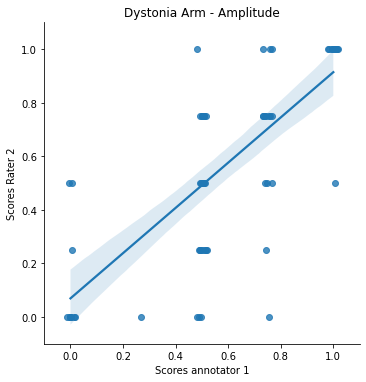

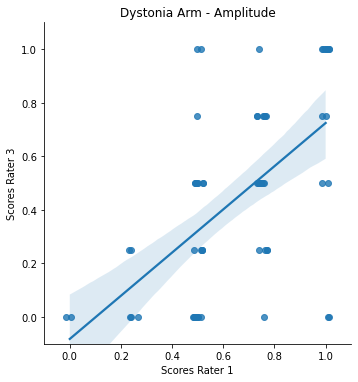

In [6]:
g=sns.lmplot(x='D_AP_R_tA_pscore_1',y='D_AP_R_tA_pscore_2', data=df_rs_combined, x_jitter=0.02)         
plt.title("Dystonia Arm - Amplitude")
g.set_axis_labels("Scores annotator 1", "Scores Rater 2" )
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)

g=sns.lmplot(x='D_AP_R_tA_pscore_1',y='D_AP_R_tA_pscore_3', data=df_rs_combined, x_jitter=0.02)         
plt.title("Dystonia Arm - Amplitude")
g.set_axis_labels("Scores Rater 1", "Scores Rater 3" )
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)

In [7]:
# Mean Absolute Error (MAE)
print(df_rs_combined.apply(lambda x: abs(x['D_AP_R_tA_pscore_1'] - x['D_AP_R_tA_pscore_2']) , axis=1).mean())
print(df_rs_combined.apply(lambda x: abs(x['D_AP_R_tA_pscore_1'] - x['D_AP_R_tA_pscore_3']) , axis=1).mean())

0.16544117647058823
0.25396825396825395


In [8]:
# Standard deviation MAE
print(df_rs_combined.apply(lambda x: abs(x['D_AP_R_tA_pscore_1'] - x['D_AP_R_tA_pscore_2']) , axis=1).std())
print(df_rs_combined.apply(lambda x: abs(x['D_AP_R_tA_pscore_1'] - x['D_AP_R_tA_pscore_3']) , axis=1).std())

0.18633490811086584
0.251976315339485


(-0.1, 1.1)

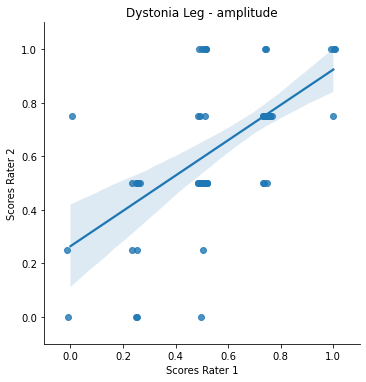

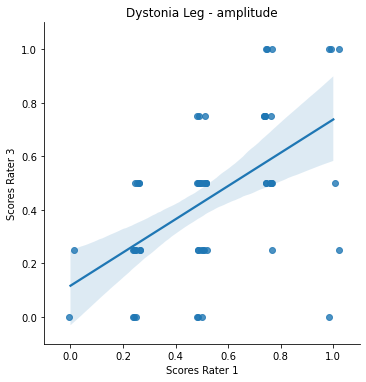

In [9]:
g=sns.lmplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_2', data=df_rs_combined, x_jitter=0.02)         
plt.title("Dystonia Leg - amplitude")
g.set_axis_labels("Scores Rater 1", "Scores Rater 2" )
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)

g=sns.lmplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_3', data=df_rs_combined, x_jitter=0.02)         
plt.title("Dystonia Leg - amplitude")
g.set_axis_labels("Scores Rater 1", "Scores Rater 3" )
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)

Text(0, 0.5, 'Scores Rater 2')

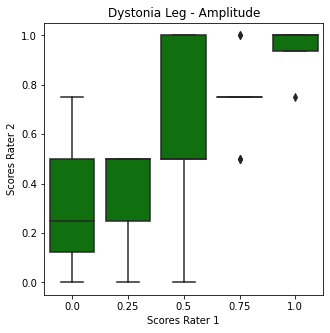

In [10]:
# Boxplot
plt.rcParams['figure.figsize']=5,5
g = sns.boxplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_2', data=df_rs_combined, palette=["g"])
plt.title("Dystonia Leg - Amplitude")  
plt.xlabel('Scores Rater 1')
plt.ylabel('Scores Rater 2')


Text(0, 0.5, 'Scores Rater 3')

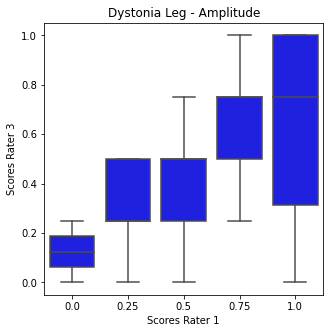

In [11]:
plt.rcParams['figure.figsize']=5,5
g = sns.boxplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_3', data=df_rs_combined, palette=["b"])
plt.title("Dystonia Leg - Amplitude")
plt.xlabel('Scores Rater 1')
plt.ylabel('Scores Rater 3')

Text(0, 0.5, 'Scores Rater 2')

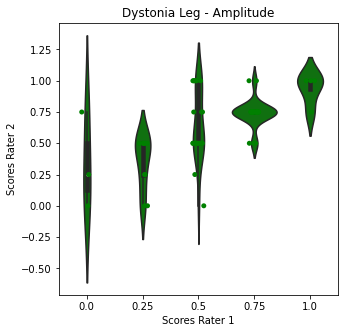

In [12]:
# Violineplot y and y-predict
plt.rcParams['figure.figsize']=5,5

g = sns.violinplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_2', data=df_rs_combined, palette=["g"])
g = sns.stripplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_2', data=df_rs_combined, palette=["g"])
plt.title("Dystonia Leg - Amplitude")
plt.xlabel('Scores Rater 1')
plt.ylabel('Scores Rater 2')



Text(0, 0.5, 'Scores Rater 3')

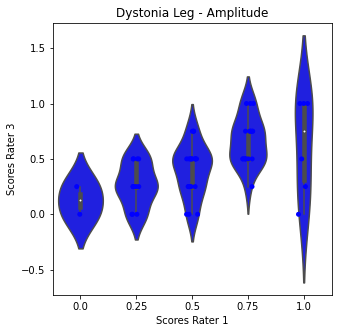

In [13]:
# Violineplot y and y-predict
plt.rcParams['figure.figsize']=5,5
g = sns.violinplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_3', data=df_rs_combined, palette=["b"])
g = sns.stripplot(x='D_LP_R_tA_pscore_1',y='D_LP_R_tA_pscore_3', data=df_rs_combined, palette=["b"])
plt.title("Dystonia Leg - Amplitude")
plt.xlabel('Scores Rater 1')
plt.ylabel('Scores Rater 3')

In [14]:
# Mean Absolute Error (MAE)
print(df_rs_combined.apply(lambda x: abs(x['D_LP_R_tA_pscore_1'] - x['D_LP_R_tA_pscore_2']) , axis=1).mean())
print(df_rs_combined.apply(lambda x: abs(x['D_LP_R_tA_pscore_1'] - x['D_LP_R_tA_pscore_3']) , axis=1).mean())

0.140625
0.18333333333333332


In [15]:
# Standard deviation MAE
print(df_rs_combined.apply(lambda x: abs(x['D_LP_R_tA_pscore_1'] - x['D_LP_R_tA_pscore_2']) , axis=1).std())
print(df_rs_combined.apply(lambda x: abs(x['D_LP_R_tA_pscore_1'] - x['D_LP_R_tA_pscore_3']) , axis=1).std())

0.18832490499471874
0.20515943916921286


[[ 1  1  0  0  0]
 [ 3  6  4  0  0]
 [ 3  6 10  3  0]
 [ 0  1  7  6  3]
 [ 1  1  1  0  3]]


[Text(0.5, 24.0, 'Score Rater 1'), Text(24.0, 0.5, 'Score Rater 3')]

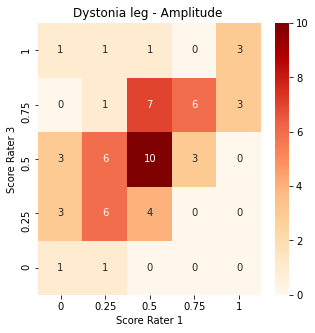

In [16]:
#leg
df_rs_combined['D_LP_R_tA_pscore_1'] = df_rs_combined['D_LP_R_tA_pscore_1'].apply(str)
df_rs_combined['D_LP_R_tA_pscore_2'] = df_rs_combined['D_LP_R_tA_pscore_2'].apply(str)
df_rs_combined['D_LP_R_tA_pscore_3'] = df_rs_combined['D_LP_R_tA_pscore_3'].apply(str)
cf_matrix1=confusion_matrix(df_rs_combined['D_LP_R_tA_pscore_1'],df_rs_combined['D_LP_R_tA_pscore_3'],labels=["0.0","0.25","0.5","0.75","1.0"])
print(cf_matrix1)
g=sns.heatmap(cf_matrix1, annot=True, cmap='OrRd')
plt.title("Dystonia leg - Amplitude ") 
plt.gca().invert_yaxis()
labels=["0", "0.25","0.5","0.75","1"]
g.set_xticklabels(labels)
g.set_yticklabels(labels)
g.set(xlabel='Score Rater 1', ylabel='Score Rater 3')


[[ 1  1  0  1  0]
 [ 2  2  6  0  0]
 [ 1  1 10  3  6]
 [ 0  0  3 21  2]
 [ 0  0  0  1  3]]


[Text(0.5, 24.0, 'Score Rater 1'), Text(24.0, 0.5, 'Score Rater 2')]

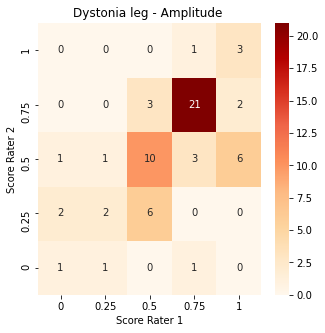

In [17]:
#leg
df_rs_combined['D_LP_R_tA_pscore_1'] = df_rs_combined['D_LP_R_tA_pscore_1'].apply(str)
df_rs_combined['D_LP_R_tA_pscore_2'] = df_rs_combined['D_LP_R_tA_pscore_2'].apply(str)
df_rs_combined['D_LP_R_tA_pscore_3'] = df_rs_combined['D_LP_R_tA_pscore_3'].apply(str)
cf_matrix1=confusion_matrix(df_rs_combined['D_LP_R_tA_pscore_1'],df_rs_combined['D_LP_R_tA_pscore_2'],labels=["0.0","0.25","0.5","0.75","1.0"])
print(cf_matrix1)
g=sns.heatmap(cf_matrix1, annot=True, cmap='OrRd')
plt.title("Dystonia leg - Amplitude ") 
plt.gca().invert_yaxis()
labels=["0", "0.25","0.5","0.75","1"]
g.set_xticklabels(labels)
g.set_yticklabels(labels)
g.set(xlabel='Score Rater 1', ylabel='Score Rater 2')

[[2 0 0 0 0]
 [3 2 0 0 0]
 [9 5 7 1 2]
 [1 4 7 6 1]
 [2 0 2 2 7]]


[Text(0.5, 24.0, 'Score Rater 1'), Text(24.0, 0.5, 'Score Rater 3')]

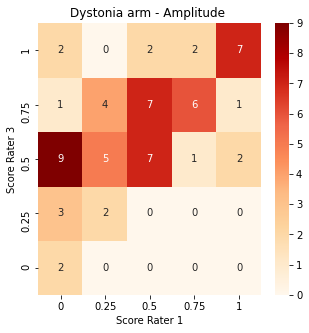

In [18]:
#arm
df_rs_combined['D_AP_R_tA_pscore_1'] = df_rs_combined['D_AP_R_tA_pscore_1'].apply(str)
df_rs_combined['D_AP_R_tA_pscore_2'] = df_rs_combined['D_AP_R_tA_pscore_2'].apply(str)
df_rs_combined['D_AP_R_tA_pscore_3'] = df_rs_combined['D_AP_R_tA_pscore_3'].apply(str)
cf_matrix1=confusion_matrix(df_rs_combined['D_AP_R_tA_pscore_1'],df_rs_combined['D_AP_R_tA_pscore_3'],labels=["0.0","0.25","0.5","0.75","1.0"])
print(cf_matrix1)
g=sns.heatmap(cf_matrix1, annot=True, cmap='OrRd')
plt.title("Dystonia arm - Amplitude ") 
plt.gca().invert_yaxis()
labels=["0", "0.25","0.5","0.75","1"]
g.set_xticklabels(labels)
g.set_yticklabels(labels)
g.set(xlabel='Score Rater 1', ylabel='Score Rater 3')


[[ 8  1  2  0  0]
 [ 1  0  0  0  0]
 [ 3  8  6 10  1]
 [ 1  1  3  7  3]
 [ 0  0  1  0 12]]


[Text(0.5, 24.0, 'Score Rater 1'), Text(24.0, 0.5, 'Score Rater 2')]

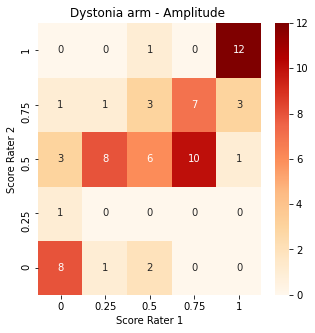

In [19]:
#arm
df_rs_combined['D_AP_R_tA_pscore_1'] = df_rs_combined['D_AP_R_tA_pscore_1'].apply(str)
df_rs_combined['D_AP_R_tA_pscore_2'] = df_rs_combined['D_AP_R_tA_pscore_2'].apply(str)
df_rs_combined['D_AP_R_tA_pscore_3'] = df_rs_combined['D_AP_R_tA_pscore_3'].apply(str)
cf_matrix1=confusion_matrix(df_rs_combined['D_AP_R_tA_pscore_1'],df_rs_combined['D_AP_R_tA_pscore_2'],labels=["0.0","0.25","0.5","0.75","1.0"])
print(cf_matrix1)
g=sns.heatmap(cf_matrix1, annot=True, cmap='OrRd')
plt.title("Dystonia arm - Amplitude ") 
plt.gca().invert_yaxis()
labels=["0", "0.25","0.5","0.75","1"]
g.set_xticklabels(labels)
g.set_yticklabels(labels)
g.set(xlabel='Score Rater 1', ylabel='Score Rater 2')